In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


catogorical features

1. sex

2. smoker

3. region

In [6]:
#checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [7]:
#statisticsl measures of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-3f2bc12d6a8e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


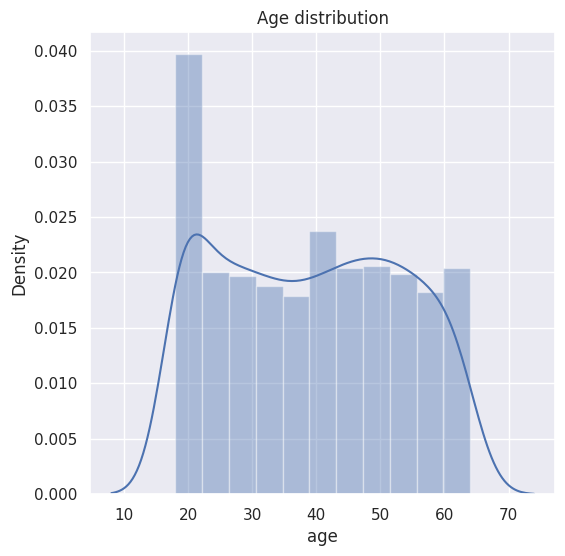

In [8]:
#distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

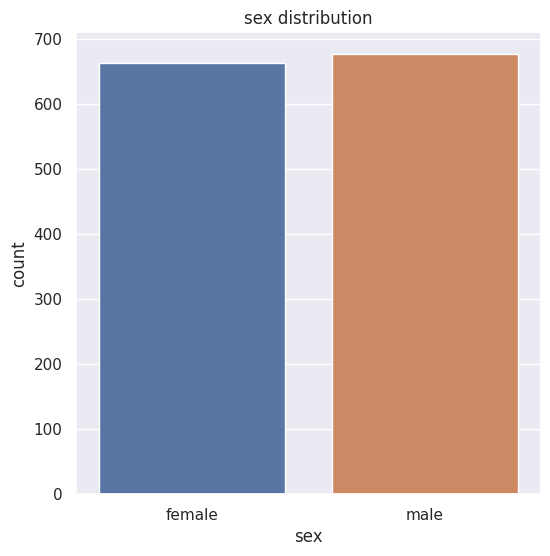

In [9]:
#gender
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex' , data = df)
plt.title('sex distribution')
plt.show()

<ipython-input-10-86a81cdc709a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


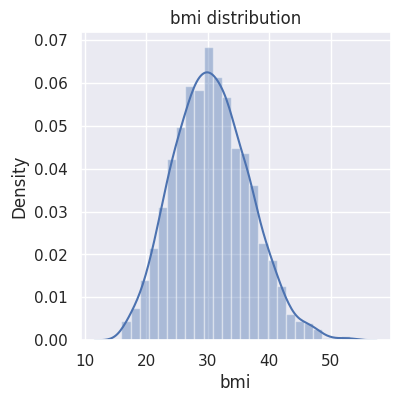

In [10]:
#distribution of BMI
plt.figure(figsize=(4,4))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

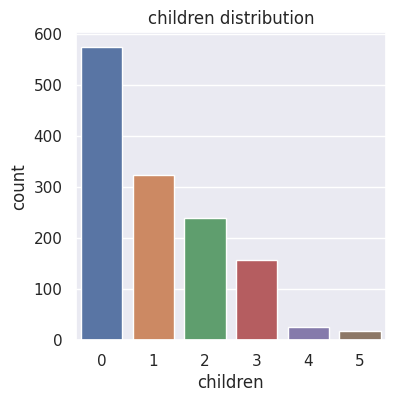

In [11]:
#children column
plt.figure(figsize=(4,4))
sns.countplot(x = 'children' , data = df)
plt.title('children distribution')
plt.show()

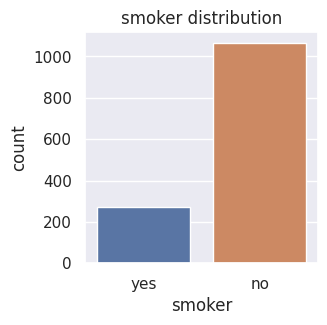

In [12]:
#smoker
plt.figure(figsize=(3,3))
sns.countplot(x = 'smoker' , data = df)
plt.title('smoker distribution')
plt.show()

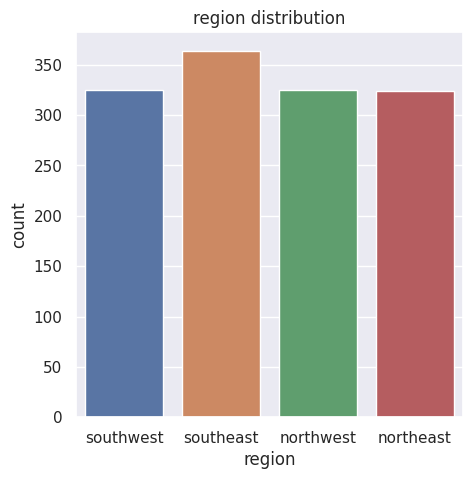

In [13]:
#region
plt.figure(figsize=(5,5))
sns.countplot(x = 'region' , data = df)
plt.title('region distribution')
plt.show()

<ipython-input-14-dc6e97e38e20>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


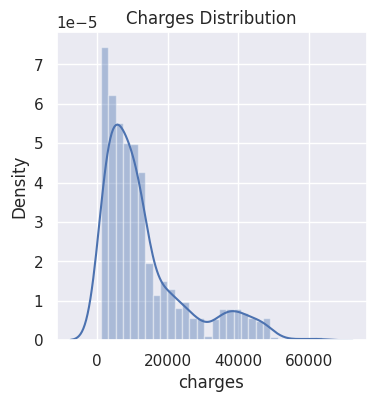

In [14]:
#distribution of charges value
plt.figure(figsize=(4,4))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

Data Preprocessing

Encoding catagorical features

In [25]:
#encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace = True)
#encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace = True)
#encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [26]:
#splitting features and target
X = df.drop(columns='charges',axis=1)
y = df['charges']

In [27]:
#splitting data intotraining and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regresiion

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

Model Evaluation


In [34]:
#prediction on training data
X_train_pred = model.predict(X_train)

#R2_score
r2_score_train = metrics.r2_score(y_train,X_train_pred)


In [35]:
print("R squared value",r2_score_train)

R squared value 0.751505643411174


In [36]:
#prediction on testing data
y_train_pred = model.predict(X_test)

#R2_score
r2_score_test = metrics.r2_score(y_test,y_train_pred)


In [37]:
print("R squared value",r2_score_test)

R squared value 0.7447273869684076


Building a Predictive system

In [38]:
input_data = (31,1,25.74,0,1,0)
input_data_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print("insurance cost is:",prediction[0])

insurance cost is: 3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
